In [9]:
import numpy as np
import laserhockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
from TD3_helpers import *
import time
import torch
import DDPG
import TD3
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [10]:
start_config = {
    "name" : "name",
    "agent_type" : "TD3",
    "env_type" : "hockey",
    "test" : False,
    "render" : False,
    "episodes" : 1000,
    "max_steps" : int(1e5),
    "mode" : "normal",
    "eps" : 0.1,
    "discount":0.99,
    "update_target_every":100,
    "update_policy_every":2,
    "hidden_sizes_actor" : [256,256],
    "hidden_sizes_critic" : [256,256],
    "iter_fit" : 1,
    "batch_size" : 256,
    "smoothing_std"  : 0.0001,
    "smoothing_clip" : 0.0002,
    "checkpoint1" : None,
    "checkpoint2" : None,
    "learning_rate_critic": 0.001,
    "learning_rate_actor": 0.001,
    "buffer_size" : int(1e6),
    "theta" : 0.005,
    "prio_replay" : False,
    "exp_phase" : 0,
    "cdq" : True,
    "ou" : False,
    "retrain" : False
}
# lr of 0.0001 for both seems to work best for hockey
# lr 0.001 for pendulum
# iter_fit 40 for walker, 20 for rest
# eps 0.1 seems to be best
# discount 1 shows best results (winning later isn't worse than earlier?)
# 20 iterations with policy delay 2 best for hockey
# "fixedactionscompare" current best agent

TD3


Training...: 100%|████████████████████████████████████████████████████████| 500000/500000 [8:07:20<00:00, 17.10steps/s]


Wins: 682
Losses: 913
Draws: 1297
W/L: 0.7469879518072289


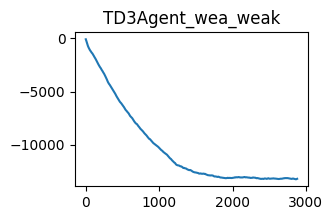

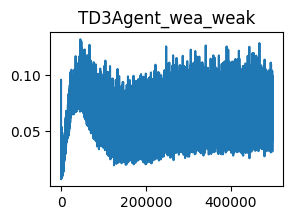

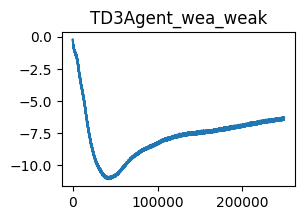

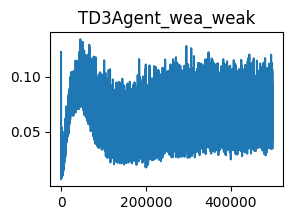

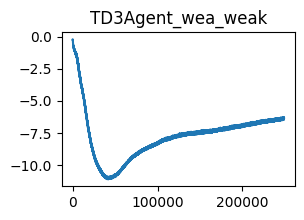

Testing...:  21%|███████████▌                                            | 207327/1000000 [01:40<06:23, 2068.04steps/s]

Wins: 294
Losses: 22
Draws: 684
W/L: 13.363636363636363


In [8]:
for agent_type in ["TD3"]:
    print(agent_type)
    config = start_config.copy()
    config["exp_phase"] = int(2e3)
    config["mode"] = "weak"
    config["agent_type"] = "TD3"
    config["max_steps"] = int(5e5)
    config["eps"] = 0.1
    config["name"] = "fixedactionscompare_more"
    config["test"] = False
    init_train(config)
    config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
    config["test"] = True
    init_train(config)

0


Training...: 100%|██████████████████████████████████████████████████████████| 100000/100000 [55:31<00:00, 30.02steps/s]


Wins: 176
Losses: 121
Draws: 252
W/L: 1.4545454545454546


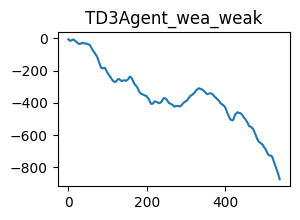

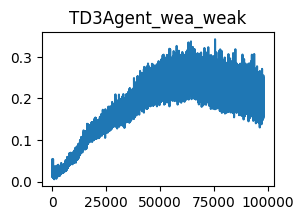

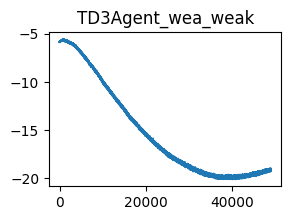

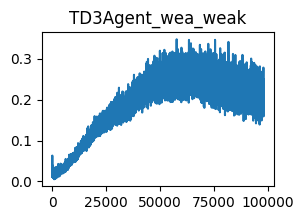

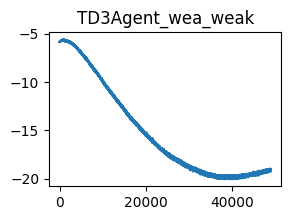

Testing...:  18%|█████████▉                                              | 177362/1000000 [01:25<06:34, 2083.55steps/s]


Wins: 244
Losses: 337
Draws: 419
W/L: 0.7240356083086054
1


Training...:   4%|██▎                                                         | 3849/100000 [00:52<22:03, 72.65steps/s]


KeyboardInterrupt: 

In [11]:

config = start_config.copy()

config["name"] = "fixedactionscompare_more"
for ii in range(10):
    print(ii)
    config["retrain"] = True
    config["exp_phase"] = int(2e3)
    config["max_steps"] = int(1e5)
    config["mode"] = "weak"
    config["agent_type"] = "TD3"
    config["eps"] = 0.05
    config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
    config["name"] = f"fixedactionscompare_more{ii}"
    config["test"] = False
    init_train(config)
    config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
    config["test"] = True
    init_train(config)

In [ ]:
### PENDULUM EXPERIMENT ###
for agent_type in ["TD3", "DDPG", "DPU", "TPS", "CDQ"]:
    print("AGENT", agent_type)
    config = start_config.copy()
    config["discount"] = 0.99
    config["episodes"] = 50
    config["max_steps"] = int(1e5)
    config["exp_phase"] = 0
    config["hidden_sizes_critic"] = [32,32]
    config["hidden_sizes_actor"] = [32,32]
    config["learning_rate_critic"] = 0.001
    config["learning_rate_actor"] = 0.001
    config["agent_type"] = agent_type
    config["env_type"] = "pendulum"
    config["name"] = "pendulum new"
    init_train(config)

In [ ]:
### CHEETAH EXPERIMENT ###
for agent_type in [ "TD3", "DDPG", "DPU", "TPS", "CDQ"]:
    print("AGENT", agent_type)
    config = start_config.copy()
    config["discount"] = 0.99
    config["episodes"] = 200
    config["exp_phase"] = int(2e3)
    config["max_steps"] = int(1e5)
    config["learning_rate_critic"] = 0.001
    config["learning_rate_actor"] = 0.001
    config["agent_type"] = agent_type
    config["env_type"] = "cheetah"
    config["name"] = "agentcompare"
    init_train(config)

In [ ]:
### WALKER EXPERIMENT ###
for agent_type in [ "TD3", "DDPG", "DPU", "TPS", "CDQ"]:
    print("AGENT", agent_type)
    config = start_config.copy()
    config["episodes"] = 500
    config["exp_phase"] = int(2e3)
    config["max_steps"] = int(2e5)
    config["learning_rate_critic"] = 0.001
    config["learning_rate_actor"] = 0.001
    config["agent_type"] = agent_type
    config["env_type"] = "walker"
    config["name"] = "actionfixagentcompare2"
    init_train(config)

In [ ]:
### WEAK EXPERIMENT ###
for agent_type in ["TD3_PRIO", "TD3", "DDPG", "DPU", "TPS", "CDQ"]:
    print("AGENT", agent_type)
    config = start_config.copy()
    config["discount"] = 0.99
    config["ou"] = False
    config["test"] = False
    config["learning_rate_critic"] = 0.0005
    config["learning_rate_actor"] = 0.0005
    config["smoothing_std"] = 0.0001
    config["smoothing_clip"] = 0.0002
    config["exp_phase"] = int(2e3)
    config["episodes"] = 1000
    config["max_steps"] = int(5e5)
    config["agent_type"] = agent_type
    config["env_type"] = "hockey"
    config["mode"] = "weak"
    config["prio_replay"] = False
    config["name"] = "low_lr_no_prio"
    init_train(config)
    config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
    config["test"] = True
    init_train(config)

In [ ]:
### NORMAL EXPERIMENT ###
for agent_type in ["TD3", "DDPG", "DPU", "TPS", "CDQ"]:
    print("AGENT", agent_type)
    config = start_config.copy()
    config["discount"] = 0.99
    config["learning_rate_critic"] = 0.001
    config["learning_rate_actor"] = 0.001
    config["exp_phase"] = 50
    config["episodes"] = 1000
    config["agent_type"] = agent_type
    config["env_type"] = "hockey"
    config["mode"] = "normal"
    config["name"] = f'agentcomparefinal'
    init_train(config)
    config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
    config["test"] = True
    init_train(config)

In [ ]:
### DEFENSE EXPERIMENT ###
for agent_type in ["TD3", "DDPG", "DPU", "TPS", "CDQ"]:
    print("AGENT", agent_type)
    config = start_config.copy()
    config["episodes"] = 1000
    config["agent_type"] = agent_type
    config["env_type"] = "hockey"
    config["mode"] = "defense"
    config["name"] = "agentcompare_new"
    init_train(config)
    config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'
    config["test"] = True
    init_train(config)

In [ ]:
### ATTACK EXPERIMENT ###
for agent_type in ["DDPG", "DPU", "TPS", "CDQ", "TD3"]:
    print("AGENT", agent_type)
    config = start_config.copy()
    config["episodes"] = 1000
    config["agent_type"] = agent_type
    config["env_type"] = "hockey"
    config["mode"] = "attack"
    config["name"] = f'env_{config["env_type"]}_agent_{agent_type}'
    init_train(config)
    config["checkpoint1"] = f'./results/{config["agent_type"]}_hockey_{config["name"]}_{config["mode"]}_agent.pth'

In [ ]:
### test best TD3 agent ###
# Note: This agent was trained much longer than the rest, no comparable agents exists for the other algorithms

config = start_config.copy()
config["test"] = True
config["max_steps"] = int(1e5)